# Analyse des données explicatives sur la qualité de l’eau

Analyse de données bivariées et multivariées

Analyse de corrélation

Prétraitement : valeur manquante, fractionnement train-test et normalisation

Modélisation : arbre de décision et classificateurs de forêts aléatoires

Visualiser l'arbre de décision

Réglage des hyperparamètres de forêt aléatoire

# Introduction

L’accès à l’eau potable est essentiel à la santé, c’est un droit humain fondamental et un élément d’une politique efficace de protection de la santé. 
C’est un problème important en matière de santé et de développement aux niveaux national, régional et local. Dans certaines régions, il a été démontré
que les investissements dans l’approvisionnement en eau et l’assainissement peuvent générer un bénéfice économique net, dans la mesure où la réduction 
des effets néfastes sur la santé et des coûts des soins de santé dépasse les coûts des interventions.
    
Boire de l’eau et rester hydraté sont associés à une incidence réduite d’infections des voies urinaires (IVU), de baisse de la tension artérielle 
et de maladies cardiaques. Boire de l’eau est donc essentiel à une bonne santé cardiaque. L'eau est le nutriment le plus important pour le corps. 
Il présente de nombreux avantages pour votre santé et contribue à vous protéger des maladies et des affections.
L'eau est également un élément essentiel d'un mode de vie sain.

In [8]:
#  importation des données 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [3]:
# Chemin du fichier
file_path = r"C:\Users\DOUMBIA\Desktop\ICONES\formation\Python\water_potability.csv"

# Charger le fichier CSV
df = pd.read_csv(file_path)

# Afficher les premières lignes du fichier
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


# Contenu des données

Valeur du pH : le pH est un paramètre important dans l’évaluation de l’équilibre acido-basique de l’eau. C'est également l'indicateur de l'état acide 
ou alcalin de l'eau. L'OMS a recommandé une limite maximale admissible de pH de 6,5 à 8,5. Les plages d'investigation actuelles étaient comprises entre 6,52 et 6,83, ce qui correspond aux normes de l'OMS.

Dureté : La dureté est principalement causée par les sels de calcium et de magnésium. Ces sels sont dissous à partir de dépôts géologiques à travers 
lesquels passe l’eau. La durée pendant laquelle l’eau est en contact avec un matériau produisant de la dureté aide à déterminer la quantité de dureté 
présente dans l’eau brute. La dureté était initialement définie comme la capacité de l’eau à précipiter le savon provoqué par le calcium et le magnésium.

Solides (Total des solides dissous - TDS) : L'eau a la capacité de dissoudre une large gamme de minéraux ou de sels inorganiques et organiques tels que 
le potassium, le calcium, le sodium, les bicarbonates, les chlorures, le magnésium, les sulfates, etc. Ces minéraux produisent un goût indésirable. 
et une couleur diluée ayant l'apparence de l'eau. C'est le paramètre important pour l'utilisation de l'eau. L'eau avec une valeur TDS élevée indique 
que l'eau est hautement minéralisée. La limite souhaitable pour le TDS est de 500 mg/l et la limite maximale est de 1 000 mg/l, prescrite pour la consommation.

Chloramines : Le chlore et la chloramine sont les principaux désinfectants utilisés dans les réseaux publics d’eau. Les chloramines se forment le plus 
souvent lorsque de l'ammoniac est ajouté au chlore pour traiter l'eau potable. Des niveaux de chlore allant jusqu'à 4 milligrammes 
par litre (mg/L ou 4 parties par million (ppm)) sont considérés comme sûrs dans l'eau potable.

Sulfate : Les sulfates sont des substances naturelles présentes dans les minéraux, le sol et les roches. Ils sont présents dans l’air ambiant, les eaux 
souterraines, les plantes et les aliments. La principale utilisation commerciale du sulfate se situe dans l’industrie chimique. 
La concentration de sulfate dans l'eau de mer est d'environ 2 700 milligrammes par litre (mg/L). Elle varie de 3 à 30 mg/L dans la plupart 
des réserves d'eau douce, bien que des concentrations beaucoup plus élevées (1 000 mg/L) soient trouvées dans certaines zones géographiques.

Conductivité : L’eau pure n’est pas un bon conducteur de courant électrique, mais plutôt un bon isolant. L'augmentation de la concentration en ions 
améliore la conductivité électrique de l'eau. Généralement, la quantité de solides dissous dans l’eau détermine la conductivité électrique. 
La conductivité électrique (CE) mesure en fait le processus ionique d'une solution qui lui permet de transmettre le courant. Selon les normes de l'OMS,
la valeur EC ne doit pas dépasser 400 μS/cm.

Carbone_organique : Le carbone organique total (COT) dans les eaux de source provient de la matière organique naturelle (MON) en décomposition ainsi que 
de sources synthétiques. Le COT est une mesure de la quantité totale de carbone contenue dans les composés organiques de l'eau pure. 
Selon l'US EPA < 2 mg/L de COT dans l'eau traitée/potable, et < 4 mg/L dans l'eau de source utilisée pour le traitement.

Trihalométhanes : Les THM sont des produits chimiques qui peuvent être présents dans l'eau traitée au chlore. La concentration de THM dans l'eau potable 
varie en fonction du niveau de matière organique présente dans l'eau, de la quantité de chlore requise pour traiter l'eau et de la température de l'eau 
traitée. Des niveaux de THM allant jusqu'à 80 ppm sont considérés comme sans danger dans l'eau potable.

Turbidité : La turbidité de l'eau dépend de la quantité de matières solides présentes à l'état en suspension. Il s'agit d'une mesure des propriétés 
électroluminescentes de l'eau et le test est utilisé pour indiquer la qualité des rejets de déchets en ce qui concerne la matière colloïdale. 
La valeur moyenne de turbidité obtenue pour le Campus Wondo Genet (0,98 NTU) est inférieure à la valeur recommandée par l'OMS de 5,00 NTU.

Potabilité : indique si l'eau est sans danger pour la consommation humaine, où 1 signifie potable et 0 signifie non potable.



# Analyse exploratoire

In [4]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


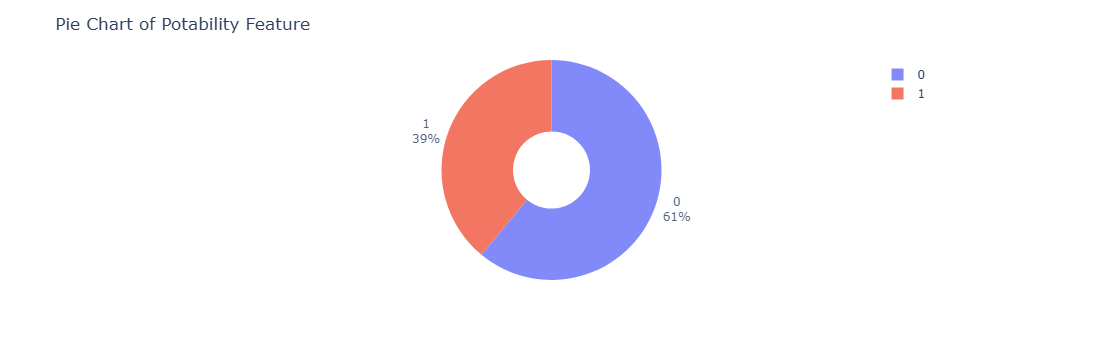

In [10]:
# Comptage des occurrences de la colonne "Potability"
d = df["Potability"].value_counts().reset_index()
d.columns = ["Potability", "count"]

# Création du graphique en secteurs
fig = px.pie(
    d,
    values="count",
    names="Potability",
    hole=0.35,
    opacity=0.8,
    labels={"Potability": "Potability", "count": "Number of Samples"},
)
fig.update_layout(title=dict(text="Pie Chart of Potability Feature"))
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()


In [ ]:
Corrélation entre les variables

In [11]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   

                 Potability  
ph                -0.003556  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.023577  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007130  
Turbidity          0.001581  
Potability         1.000000

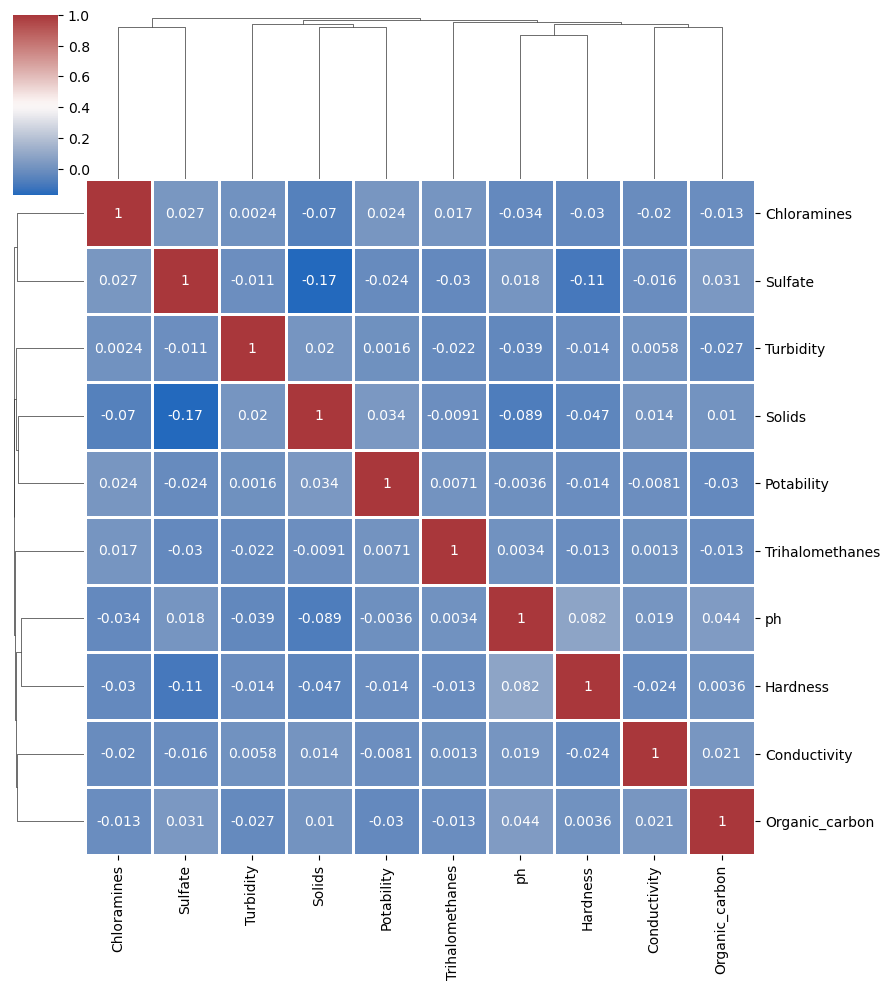

In [13]:
# Vérifiez que le DataFrame contient uniquement des colonnes numériques
corr_matrix = df.corr()

# Génération de la carte de chaleur avec clustering
sns.clustermap(
    corr_matrix,
    cmap="vlag",
    dendrogram_ratio=(0.1, 0.2),
    annot=True,
    linewidths=0.8,
    figsize=(9, 10),
)

# Affichage de la figure
plt.show()


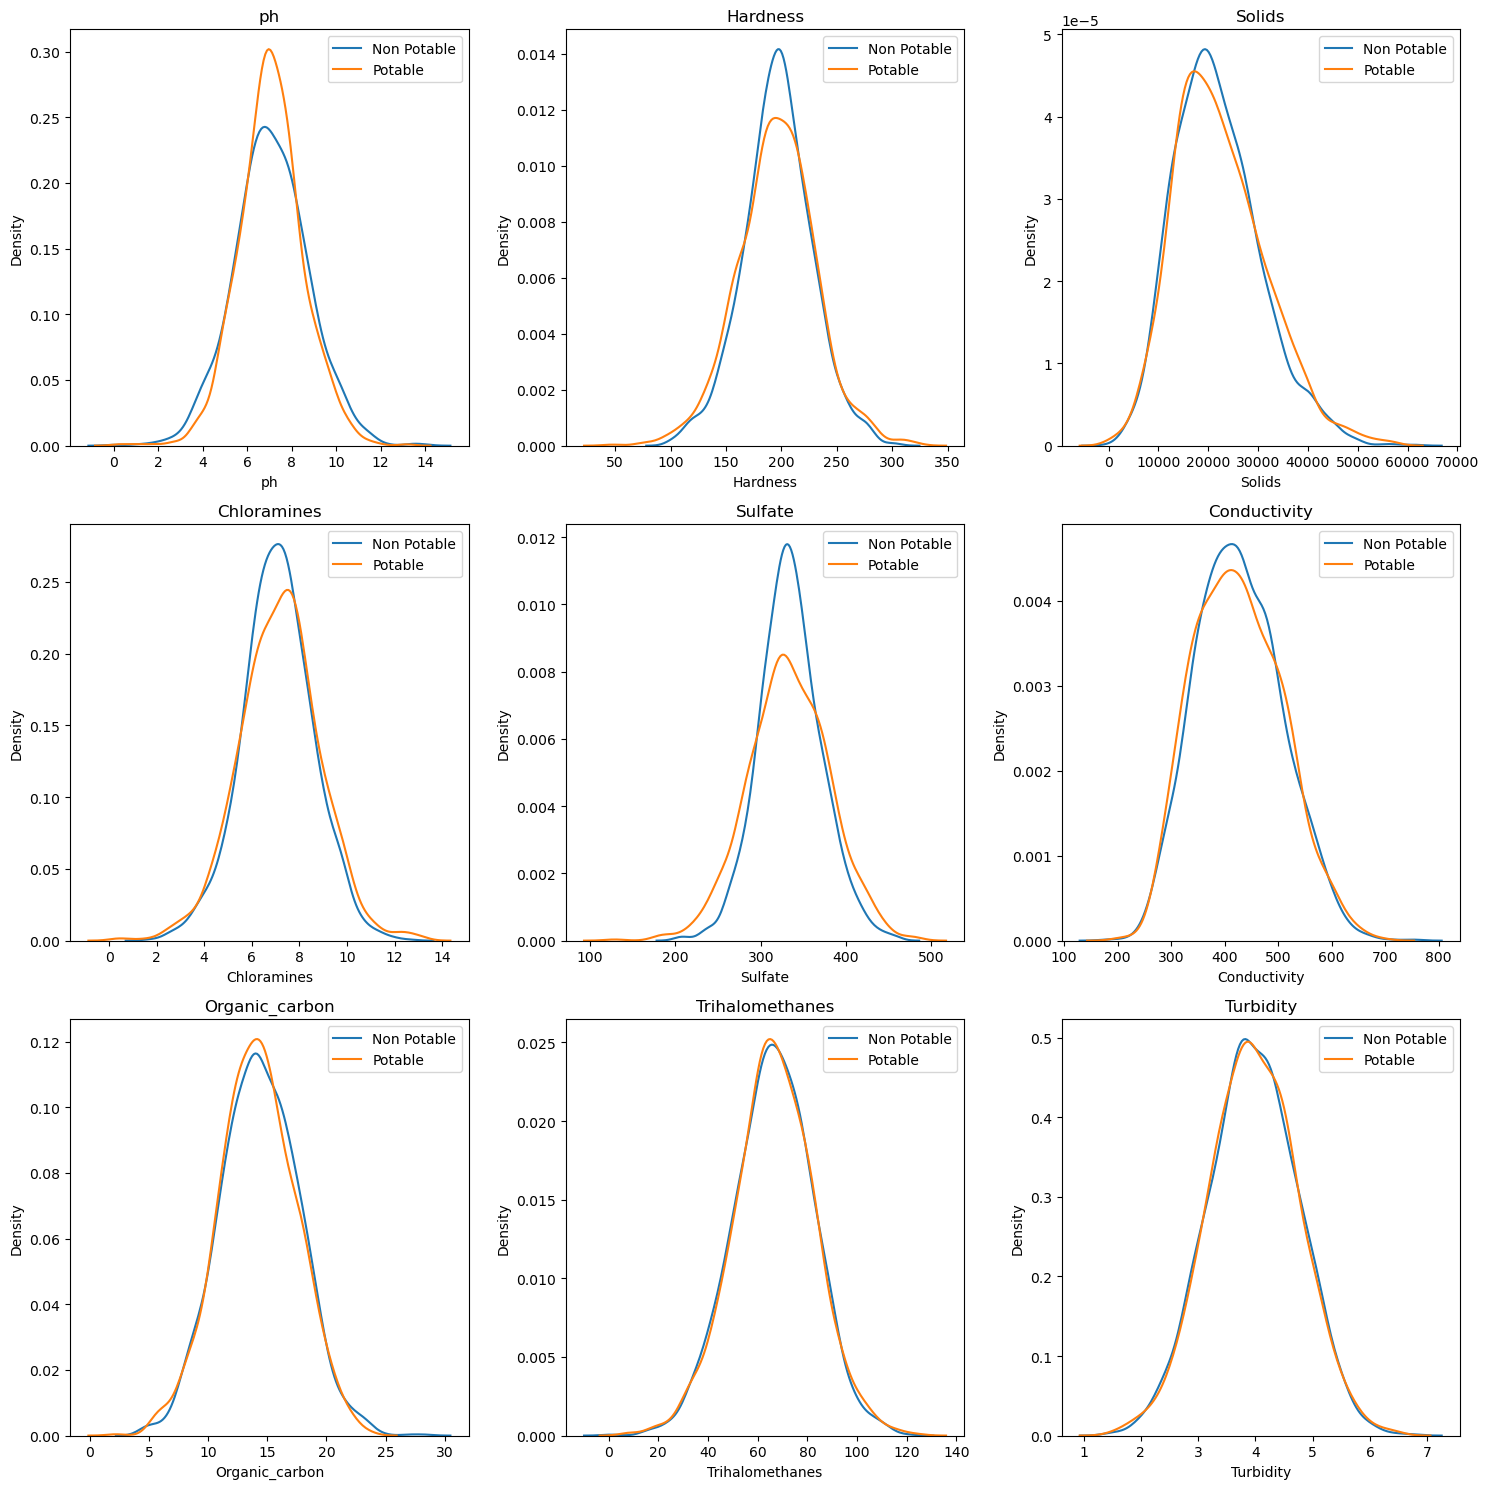

In [14]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

In [ ]:
Preprocessing

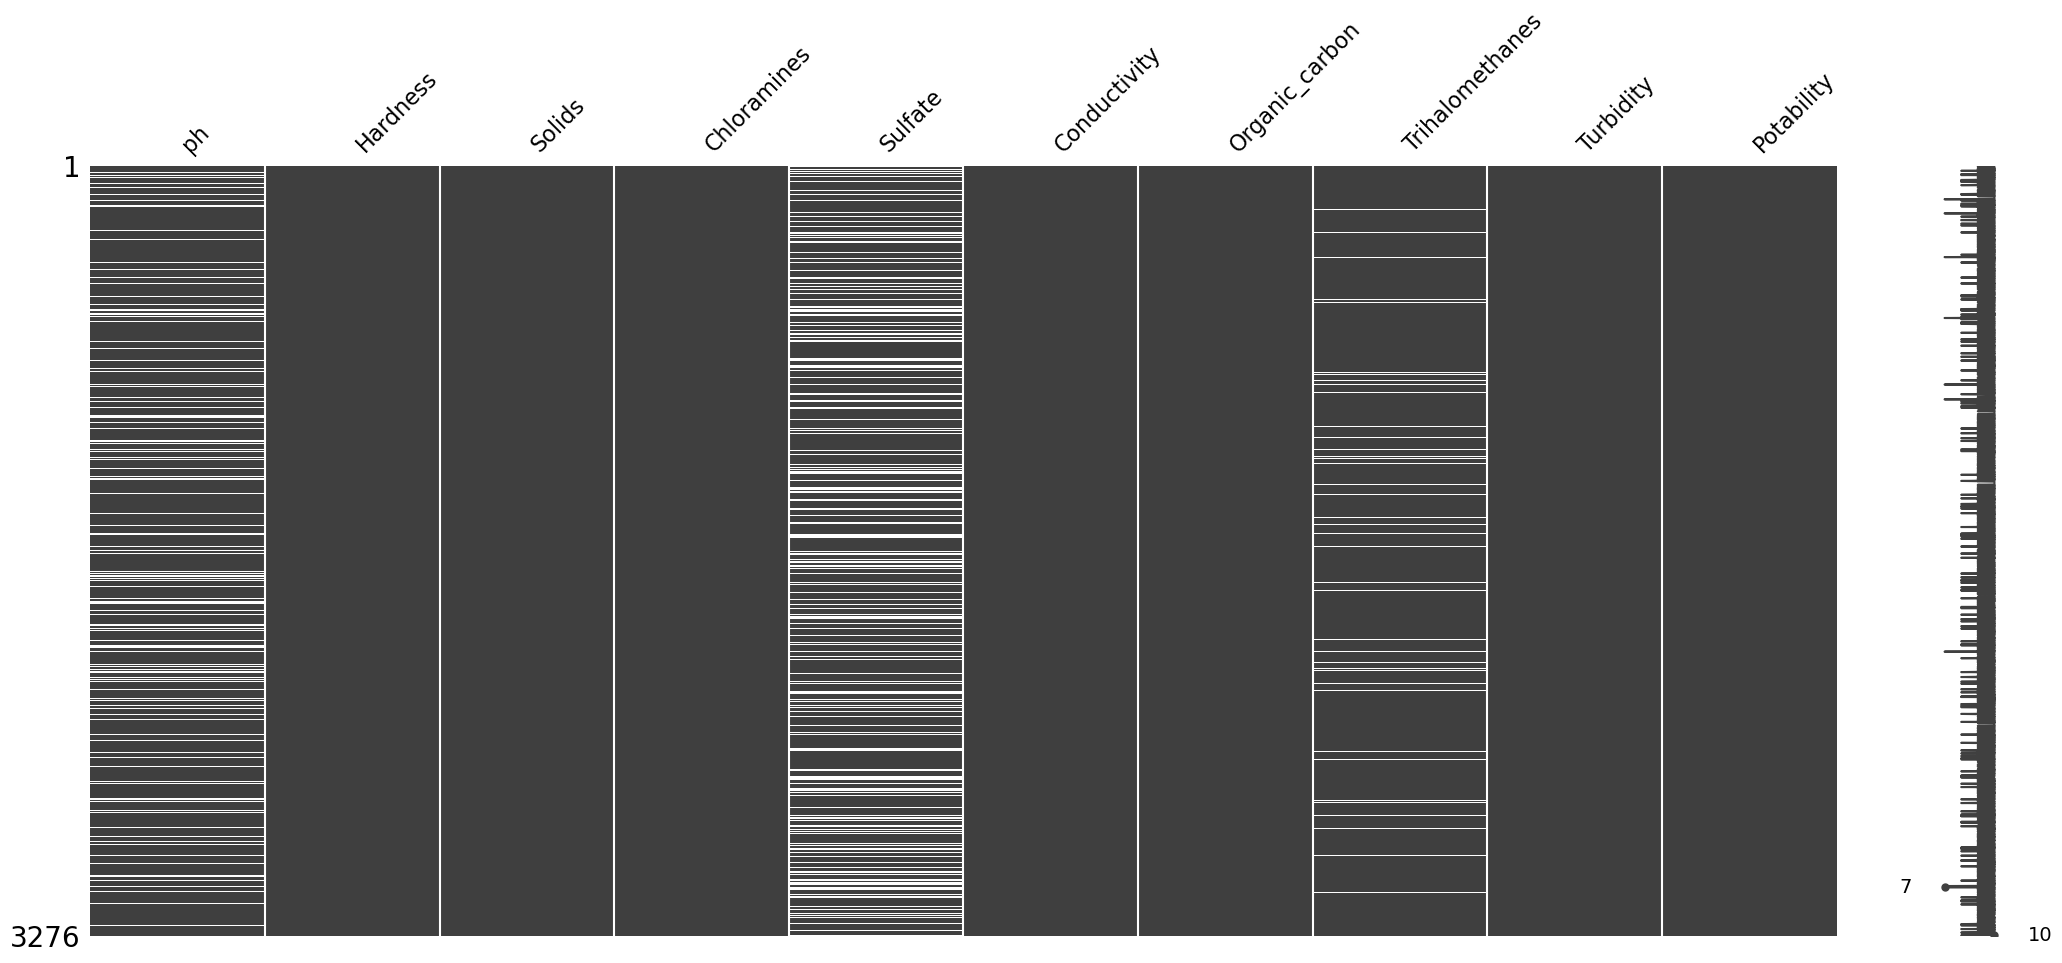

In [15]:
msno.matrix(df)
plt.show()

In [16]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [17]:
# remplacons les variables manquantes par la mean
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

C:\Users\DOUMBIA\AppData\Local\Temp\ipykernel_11612\4248612.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\DOUMBIA\AppData\Local\Temp\ipykernel_11612\4248612.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [18]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
Preprocessing: Train-Test Split et normalisation

In [19]:
X = df.drop("Potability", axis = 1).values
y = df["Potability"].values

In [21]:
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2293, 9)
X_test (983, 9)
y_train (2293,)
y_test (983,)


In [22]:
# min-max normalisation
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

# Modélisation : arbre de décision et classificateurs de forêts aléatoires
Score de précision : La précision est le rapport tp/(tp + fp) où tp est le nombre de vrais positifs et fp le nombre de faux positifs. 
La précision est intuitivement la capacité du classificateur à ne pas qualifier de positif un échantillon qui est négatif.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Définition des modèles
models = [
    ("DTC", DecisionTreeClassifier(max_depth=3)),  # Arbre de décision avec profondeur maximale de 3
    ("RF", RandomForestClassifier())              # Forêt aléatoire avec les hyperparamètres par défaut
]


In [24]:
from sklearn.metrics import precision_score, confusion_matrix

# Liste pour stocker les résultats et matrices de confusion
finalResults = []
cmList = []

# Entraînement, prédiction et évaluation des modèles
for name, model in models:
    model.fit(X_train, y_train)  # Entraînement du modèle
    model_result = model.predict(X_test)  # Prédiction sur l'ensemble de test
    
    # Calcul de la précision
    score = precision_score(y_test, model_result, average='binary')  # Ajustez 'average' si multi-classes
    
    # Calcul de la matrice de confusion
    cm = confusion_matrix(y_test, model_result)
    
    # Stockage des résultats
    finalResults.append((name, score))
    cmList.append((name, cm))

# Affichage des résultats
finalResults


[('DTC', 0.5652173913043478), ('RF', 0.6428571428571429)]

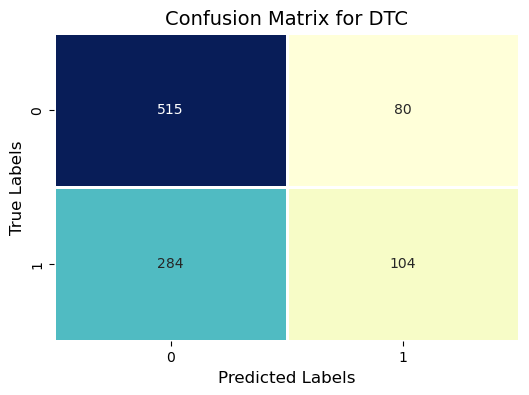

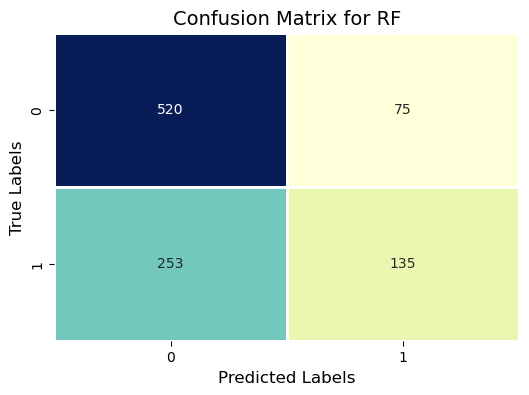

In [25]:
# Visualisation des matrices de confusion
for name, i in cmList:
    plt.figure(figsize=(6, 4))  # Taille du graphique
    sns.heatmap(i, annot=True, linewidths=0.8, fmt="d", cmap="YlGnBu", cbar=False)
    plt.title(f"Confusion Matrix for {name}", fontsize=14)
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.show()

In [26]:
dt_clf = models[0][1]
dt_clf

DecisionTreeClassifier(max_depth=3)

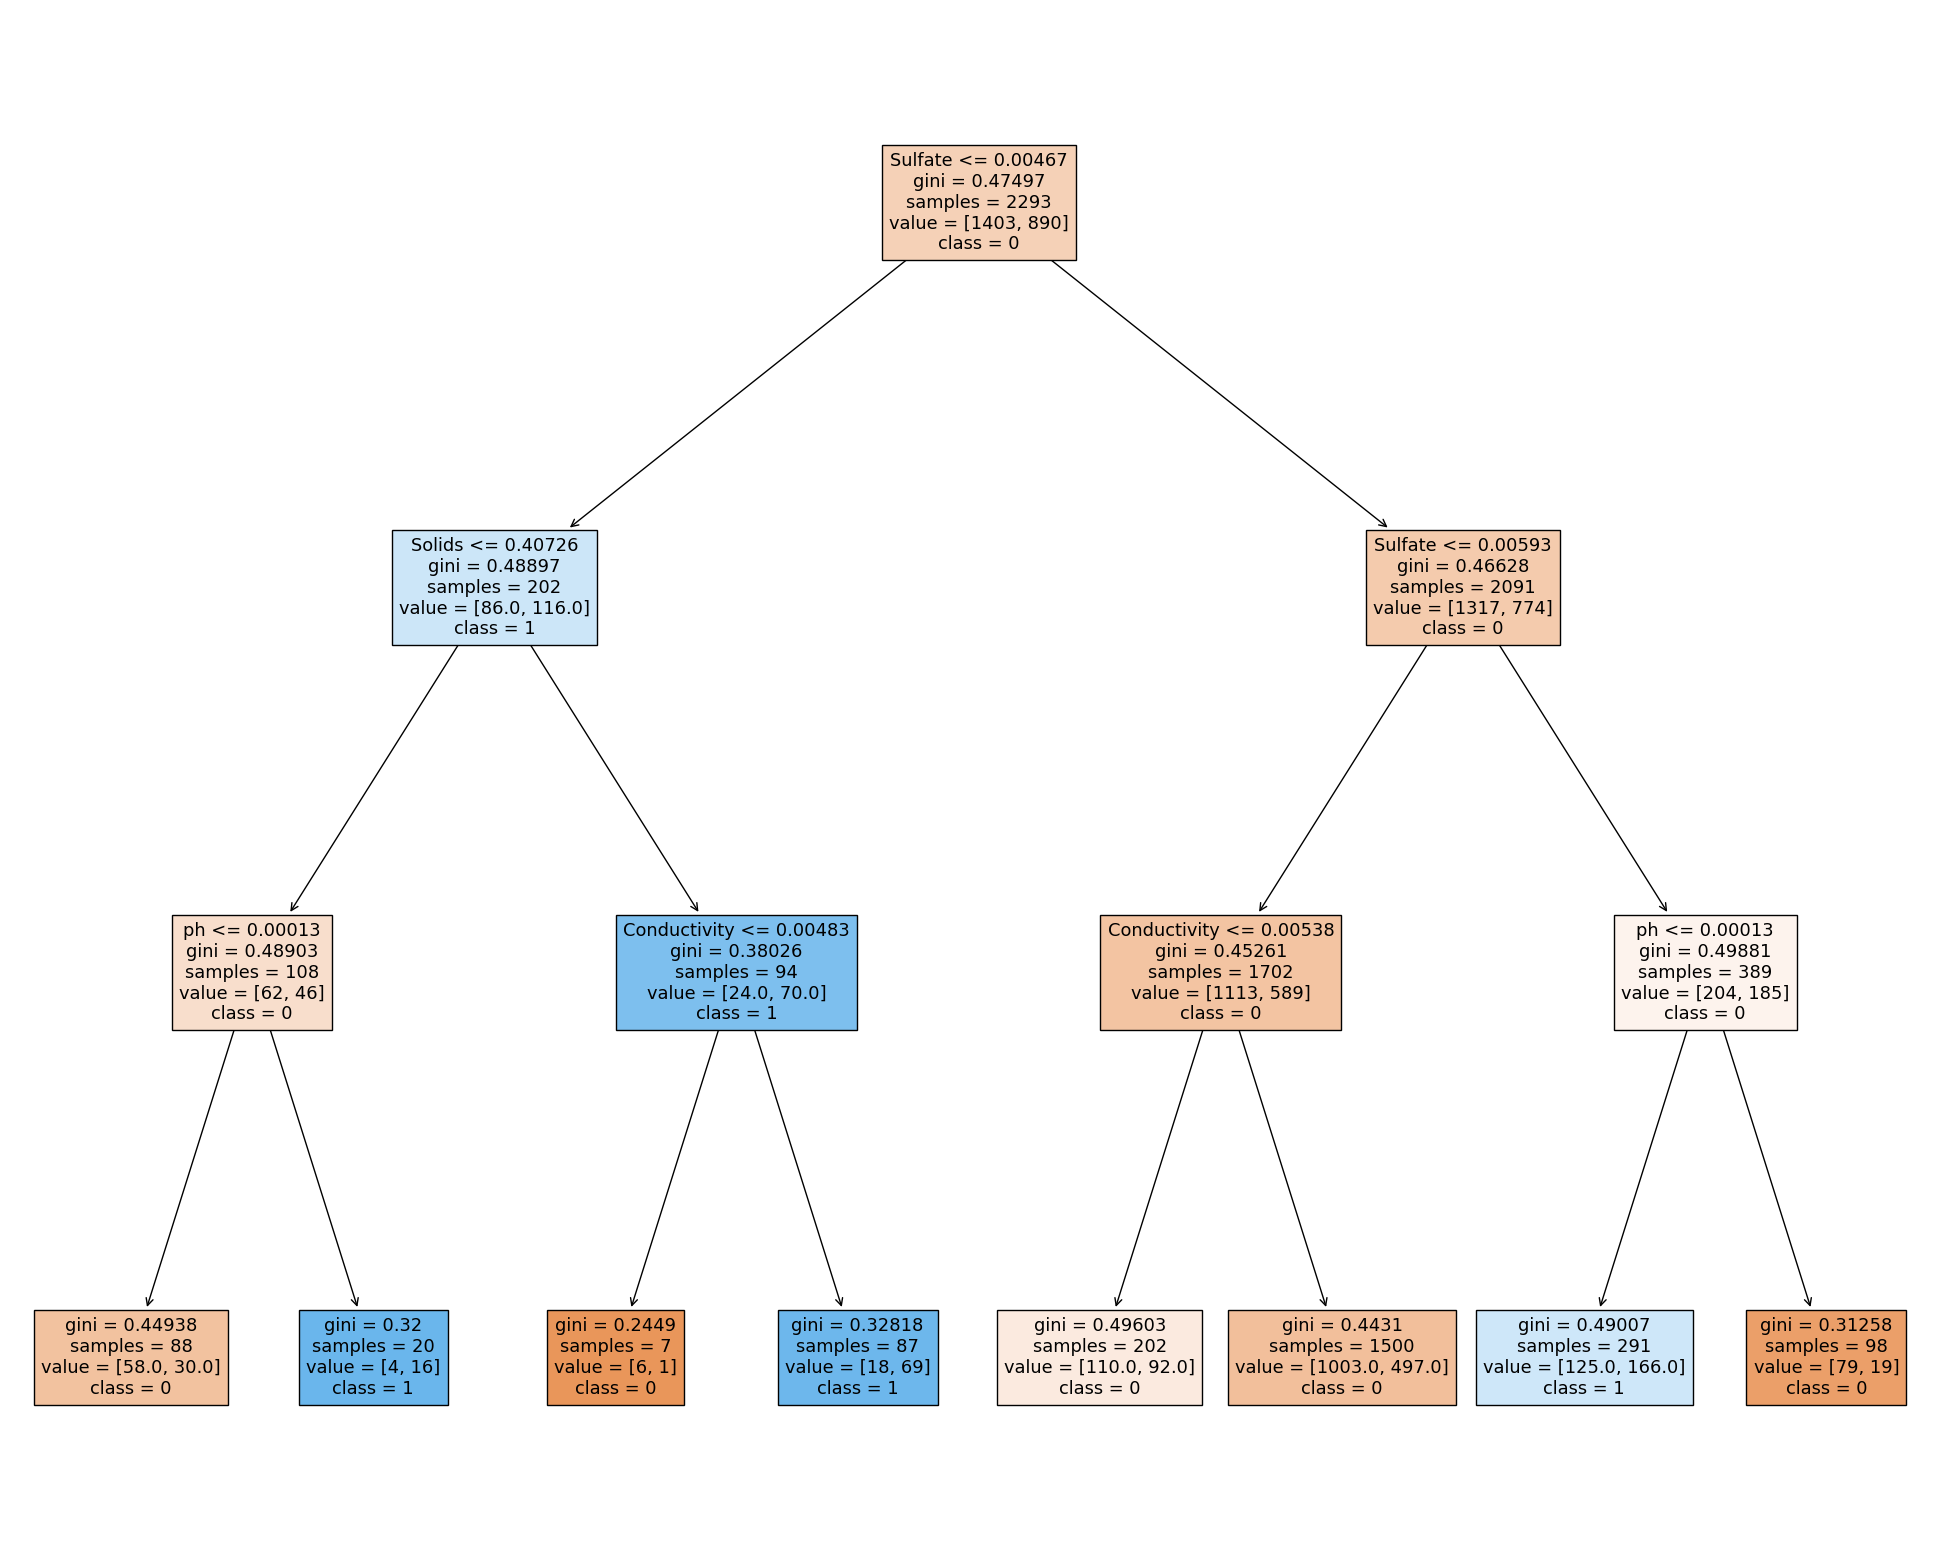

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (25, 20))
plot_tree(dt_clf,
          feature_names = df.columns.tolist()[:-1],  # Noms des features, sans la colonne cible
          class_names = ["0", "1"],  # Classes cibles
          filled = True,  # Remplir les noeuds avec des couleurs
          precision = 5)  # Précision des valeurs
plt.show()


In [28]:
model_params = {
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [10, 50, 100],  # Nombre d'arbres dans la forêt
            "max_features": ["auto", "sqrt", "log2"],  # Nombre de features à considérer pour chaque split
            "max_depth": list(range(1, 21, 3))  # Profondeur maximale de chaque arbre
        }
    }
}


In [29]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Définition de la stratégie de validation croisée
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

# Liste pour stocker les résultats
scores = []

# Boucle sur les modèles et paramètres
for model_name, params in model_params.items():
    # Initialisation du RandomizedSearchCV avec le modèle et les paramètres
    rs = RandomizedSearchCV(params["model"], params["params"], cv=cv, n_iter=10, random_state=42)
    
    # Entraînement du modèle avec les données d'entrée X et y
    rs.fit(X, y)
    
    # Ajout des meilleurs résultats dans la liste scores
    scores.append([model_name, dict(rs.best_params_), rs.best_score_])

# Affichage des scores et des meilleurs paramètres
scores


C:\python\environement python\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\python\environement python\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\python\environement python\anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\python\environement python\anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constr

[['Random Forest',
  {'n_estimators': 50, 'max_features': 'log2', 'max_depth': 19},
  0.6701775740085645]]

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Définition des classificateurs et des hyperparamètres à tester
model_params = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [10, 50, 100],
            "max_depth": [None, 10, 20, 30],
            "max_features": ["auto", "sqrt", "log2"]
        }
    },
    "SVM": {
        "model": SVC(random_state=42),
        "params": {
            "kernel": ["linear", "rbf"],
            "C": [0.1, 1, 10],
            "gamma": ["scale", "auto"]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ["lbfgs", "liblinear"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    }
}

# Dictionnaire pour stocker les résultats
results = {}

# Loop pour effectuer GridSearchCV pour chaque modèle
for model_name, params in model_params.items():
    print(f"Recherche des meilleurs hyperparamètres pour {model_name}...")
    
    # Création de l'objet GridSearchCV pour chaque modèle
    grid_search = GridSearchCV(params["model"], params["params"], cv=5, n_jobs=-1, scoring='accuracy')
    
    # Entraînement du modèle avec la recherche par grille
    grid_search.fit(X_train, y_train)
    
    # Meilleurs paramètres et score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Entraîner le modèle avec les meilleurs paramètres sur le jeu complet d'entraînement
    best_model = grid_search.best_estimator_
    
    # Prédiction et évaluation du modèle
    y_pred = best_model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Stocker les résultats
    results[model_name] = {
        "Best Params": best_params,
        "Best Cross-Validation Score": best_score,
        "Precision": precision,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }

# Affichage des résultats
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Best Params: {metrics['Best Params']}")
    print(f"Best Cross-Validation Score: {metrics['Best Cross-Validation Score']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}\n")


Recherche des meilleurs hyperparamètres pour Random Forest...


C:\python\environement python\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "C:\python\environement python\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\python\environement python\anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\python\environement python\anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constr

Recherche des meilleurs hyperparamètres pour SVM...


C:\python\environement python\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Recherche des meilleurs hyperparamètres pour Logistic Regression...


C:\python\environement python\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Recherche des meilleurs hyperparamètres pour KNN...
Model: Random Forest
Best Params: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
Best Cross-Validation Score: 0.6577
Precision: 0.6089
F1 Score: 0.4169
Confusion Matrix:
[[516  79]
 [265 123]]

Model: SVM
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.6119
Precision: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[595   0]
 [388   0]]

Model: Logistic Regression
Best Params: {'C': 0.1, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.6119
Precision: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[595   0]
 [388   0]]

Model: KNN
Best Params: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best Cross-Validation Score: 0.5844
Precision: 0.3319
F1 Score: 0.2524
Confusion Matrix:
[[436 159]
 [309  79]]



# Conclusion :
Random Forest semble être le modèle le plus performant parmi ceux testés, bien que le score F1 reste faible. Nous pouvons envisager 
d'améliorer ce score en ajustant les classes ou en utilisant des techniques de rééchantillonnage (par exemple, SMOTE ou undersampling).
SVM et Logistic Regression ne parviennent pas à bien classer les classes positives, probablement à cause d'un déséquilibre des classes. 
Une solution serait d'appliquer des techniques de rééchantillonnage ou d'ajuster les paramètres comme class_weight pour traiter le problème de 
classe déséquilibrée.
    
KNN est également un bon modèle, mais il nécessite peut-être plus de réglages ou une exploration de différents hyperparamètres pour améliorerses performances.